# Setup

In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.6/489.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


In [ ]:
import os, cv2
import numpy as np
from tensorflow.keras.applications import VGG19
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model, load_model
from matplotlib import pyplot as plt

In [ ]:
!git clone https://github.com/iGioRojas/Deteccion-Plagas

Cloning into 'Deteccion-Plagas'...
remote: Enumerating objects: 15846, done.
remote: Counting objects: 100% (4440/4440), done.
remote: Compressing objects: 100% (4437/4437), done.
remote: Total 15846 (delta 2), reused 4439 (delta 1), pack-reused 11406
Receiving objects: 100% (15846/15846), 534.60 MiB | 16.18 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (18745/18745), done.


In [ ]:
os.chdir('/content/Deteccion-Plagas/dataset')

In [ ]:
test_dir = os.listdir("test")
train_dir = os.listdir("train")
newDataTrain_dir = os.listdir("new_data/train")
newDataTest_dir = os.listdir("new_data/test")

In [ ]:
test_dict = dict()
train_dict = dict()

for i in test_dir:
  tmp1 = f"test/{i}"
  tmp2 = f"train/{i}"

  test_list = []
  train_list = []
  for v in os.listdir(tmp1):
    if v.endswith(".jpg"):
      test_list.append(f"test/{i}/{v}")
  for w in os.listdir(tmp2):
    if w.endswith(".jpg"):
      train_list.append(f"train/{i}/{w}")

  test_dict[i] = test_list
  train_dict[i] = train_list

In [ ]:
#Juntar con data augmentation
for i in newDataTest_dir:
  tmp1 = f"new_data/test/{i}"
  tmp2 = f"new_data/train/{i}"

  for v in os.listdir(tmp1):
    if v.endswith(".jpg"):
      test_dict[i].append(f"new_data/test/{i}/{v}")
  for w in os.listdir(tmp2):
    if w.endswith(".jpg"):
      train_dict[i].append(f"new_data/train/{i}/{w}")

In [ ]:
#Juntar data
print("DATOS PARA ENTRENAR")
print("Nematodo",len(train_dict['nematode'])) #786 ----- 80% = 252
print("Black Bug",len(train_dict['black_bug'])) #2000 ----- 80% = 648
print("Any Insect",len(train_dict['any_insect'])) #8643 ----- 80% = 3600
print("Not Insect",len(train_dict['not_insect'])) #5120 ----- 80% = 3100
print("-------------------------------------------------")
print("DATOS PARA Test")
print("Nematodo",len(test_dict['nematode'])) #63 ----- 20% = 63
print("Black Bug",len(test_dict['black_bug'])) #162 ----- 20% = 162
print("Any Insect",len(test_dict['any_insect'])) #900 ----- 20% = 900
print("Not Insect",len(test_dict['not_insect'])) #775 ----- 20% = 775

DATOS PARA ENTRENAR
Nematodo 786
Black Bug 2000
Any Insect 8643
Not Insect 5120
-------------------------------------------------
DATOS PARA Test
Nematodo 63
Black Bug 162
Any Insect 900
Not Insect 775


# Train - test arrays

In [ ]:
# one hot = [picudo, nematodo, otro insecto, no es insecto]
# len(train_dict["nematode"])  #786=86% - 30=14% 
# len(train_dict["black_bug"]) #480 - 120

X_train = []
Y_train = []
for i, j , k , l in zip(train_dict["black_bug"][:250], train_dict["nematode"][:250],train_dict["any_insect"][:250],train_dict["not_insect"][:250]):
  # Leer una imagen en formato BGR
  img1 = cv2.imread(i) #[:,:,::-1] para data augmentation
  img2 = cv2.imread(j) #[:,:,::-1]
  img3 = cv2.imread(k) #[:,:,::-1] para data augmentation
  img4 = cv2.imread(l) #[:,:,::-1]

  # Convertir a formato RGB
  if(img1 is not None and img2 is not None and img3 is not None and img4 is not None):
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
    img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
    
    # Redimensionar la imagen
    img1 = cv2.resize(img1, (224, 224))
    img2 = cv2.resize(img2, (224, 224))
    img3 = cv2.resize(img3, (224, 224))
    img4 = cv2.resize(img4, (224, 224))
    
    # Guardar la imagen en un array de numpy
    np_image1 = np.array(img1)
    X_train.append(np_image1)
    Y_train.append([1,0,0,0])

    np_image2 = np.array(img2)
    X_train.append(np_image2)
    Y_train.append([0,1,0,0])

    np_image3 = np.array(img3)
    X_train.append(np_image3)
    Y_train.append([0,0,1,0])

    np_image4 = np.array(img4)
    X_train.append(np_image4)
    Y_train.append([0,0,0,1])

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
len(X_train)

1000

In [ ]:
X_test = []
Y_test = []

for i, j , k , l in zip(train_dict["black_bug"][:50], train_dict["nematode"][:50],train_dict["any_insect"][:50],train_dict["not_insect"][:50]):
  # Leer una imagen en formato BGR
  img1 = cv2.imread(i)
  img2 = cv2.imread(j)
  img3 = cv2.imread(k) #[:,:,::-1] para data augmentation
  img4 = cv2.imread(l) #[:,:,::-1]

  # Convertir a formato RGB
  if(img1 is not None and img2 is not None and img3 is not None and img4 is not None):
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
    img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
    
    # Redimensionar la imagen
    img1 = cv2.resize(img1, (224, 224))
    img2 = cv2.resize(img2, (224, 224))
    img3 = cv2.resize(img3, (224, 224))
    img4 = cv2.resize(img4, (224, 224))
  
    # Guardar la imagen en un array de numpy
    np_image1 = np.array(img1)
    X_test.append(np_image1)
    Y_test.append([1,0,0,0])

    np_image2 = np.array(img2)
    X_test.append(np_image2)
    Y_test.append([0,1,0,0])

    np_image3 = np.array(img3)
    X_test.append(np_image3)
    Y_test.append([0,0,1,0])

    np_image4 = np.array(img4)
    X_test.append(np_image4)
    Y_test.append([0,0,0,1])

X_test = np.array(X_test)/255
Y_test = np.array(Y_test)

(224, 224, 3)


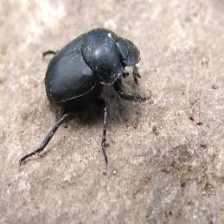

In [ ]:
X_train[0]
print(X_train[0].shape)

from PIL import Image
import numpy as np
from IPython.display import  display

img1 = Image.fromarray(X_train[2], 'RGB')
display(img1)

In [ ]:
Y_train[0]
print(Y_train[0].shape)
print(X_train[0].shape)
X_train = np.array(X_train)/255 #Normalizar

(4,)
(224, 224, 3)


(224, 224, 3)


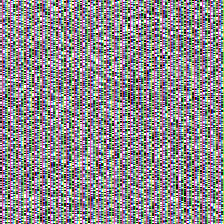

In [ ]:
X_train[0]
print(X_train[0].shape)

from PIL import Image
import numpy as np
from IPython.display import  display

img1 = Image.fromarray(X_train[2], 'RGB')
display(img1)

# Shuffle - Data augmentation

In [ ]:
from sklearn.utils import shuffle
X, Y = shuffle(X_train, Y_train, random_state=0)
V, W = shuffle(X_test, Y_test, random_state=0)

In [ ]:
from PIL import Image
import numpy as np
from IPython.display import  display

img1 = Image.fromarray(X[0], 'RGB')
display(img1)

In [ ]:
#El siguiente código se usó para hacer data augmentation dado un directorio de img, no es necesario correrlo debido a que en el repositorio de github ya está incluida la data augmentation
import os
import numpy as np
import cv2
from keras_preprocessing.image import load_img, ImageDataGenerator


DG_folder='new_data'
images_increased = 1

try:
    os.mkdir(DG_folder)
except:
    print("")
    
train_datagen = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)


data_path = "/content/Deteccion-Plagas/dataset/test/not_insect"
data_dir_list = os.listdir(data_path)


width_shape, height_shape = 224, 244

i=0
num_images=0
for image_file in data_dir_list:
    img_list=os.listdir(data_path)

    img_path = data_path + '/'+ image_file

    imge=load_img(img_path)
    
    imge=cv2.resize(np.array(imge), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
    x = imge/255
    x = np.expand_dims(x,axis=0)
    t=1
    for output_batch in train_datagen.flow(x,batch_size=1):
        a=np.array(output_batch[0])
        imagen=output_batch[0,:,:]*255
        imgfinal = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        cv2.imwrite(DG_folder+"/not_insect_%i%i.jpg"%(i,t), imgfinal) 
        t+=1
        
        num_images+=1
        if t>images_increased:
            break
    i+=1
    
print("images generated",num_images)

# Training

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

# Cargar la implementación pre-entrenada de VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas de VGG19
for layer in base_model.layers:
    layer.trainable = False

# Agregar capas de CNN personalizadas
x = base_model.output
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo con tus datos de entrenamiento
history = model.fit(X, Y, batch_size=16, epochs=7, validation_data=(V, W))

Epoch 1/7
63/63 [==============================] - 7s 105ms/step - loss: 0.7109 - accuracy: 0.7010 - val_loss: 0.2872 - val_accuracy: 0.8950
Epoch 2/7
63/63 [==============================] - 6s 98ms/step - loss: 0.2866 - accuracy: 0.8830 - val_loss: 0.1475 - val_accuracy: 0.9600
Epoch 3/7
63/63 [==============================] - 6s 98ms/step - loss: 0.1494 - accuracy: 0.9490 - val_loss: 0.0864 - val_accuracy: 0.9750
Epoch 4/7
63/63 [==============================] - 6s 97ms/step - loss: 0.1069 - accuracy: 0.9620 - val_loss: 0.0606 - val_accuracy: 0.9750
Epoch 5/7
63/63 [==============================] - 6s 97ms/step - loss: 0.0670 - accuracy: 0.9750 - val_loss: 0.0178 - val_accuracy: 0.9900
Epoch 6/7
63/63 [==============================] - 6s 102ms/step - loss: 0.0170 - accuracy: 0.9930 - val_loss: 0.0126 - val_accuracy: 0.9950
Epoch 7/7
63/63 [==============================] - 6s 100ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000


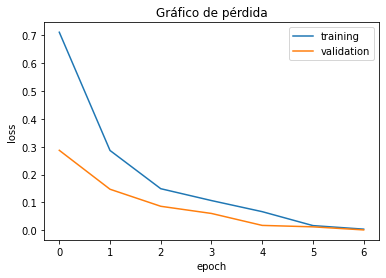

In [ ]:
# Visualizar Historico para pérdida.
plt.title('Gráfico de pérdida')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


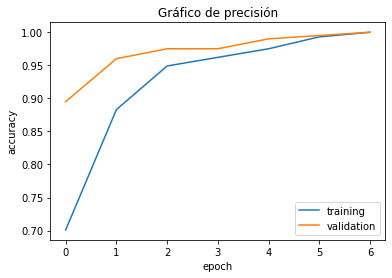

In [ ]:
# Visualizar Historico para precisión.
plt.title('Gráfico de precisión')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [ ]:
#TODO: data augmentation (shuffle) R// subido al repositorio
#TODO: clasificacion para otro insecto y no insecto R// check

#Test


In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

7/7 [==============================] - 1s 134ms/step - loss: 0.0038 - accuracy: 1.0000
Test Accuracy: 1.0
Test Loss: 0.0037738538812845945


In [ ]:
model.save("modelo_plagas.h5")

# Predicción demo

In [ ]:
print(X_test[159].shape)
model.summary()

(224, 224, 3)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 1

In [ ]:
config = model.get_config() 
print(config["layers"][0]["config"]["batch_input_shape"])

(None, 224, 224, 3)


In [ ]:


imgDemo = cv2.imread("/content/Deteccion-Plagas/dataset/test/black_bug/black_bug_11.jpg")

imgDemo = cv2.cvtColor(imgDemo, cv2.COLOR_BGR2RGB)

# Redimensionar la imagen
imgDemo = cv2.resize(imgDemo, (224, 224))

# Guardar la imagen en un array de numpy
np_image = np.array(imgDemo)
np_image = np.expand_dims(np_image,axis=0)



In [ ]:
from keras.models import load_model
one_hot = ["Picudo Negro", "Nematodo", "Insecto Génerico", "No existe insecto en la imagen"]
#Solo para probar el modelo cargado en el drive
model2 = load_model('/content/drive/MyDrive/Data_Augmentation/modelo_plagas.h5')
#eval = model2.evaluate(test_imgs, test_annot, verbose=2)
predictions = model2.predict(np_image)

maximo = np.argmax(predictions)
print("La predición dice: ", one_hot[maximo])

print(predictions)

La predición dice:  Picudo Negro
[[1. 0. 0. 0.]]
